<a href="https://colab.research.google.com/github/Khyatikhurana/Deep-Learning-1-/blob/main/DL_CycleSheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

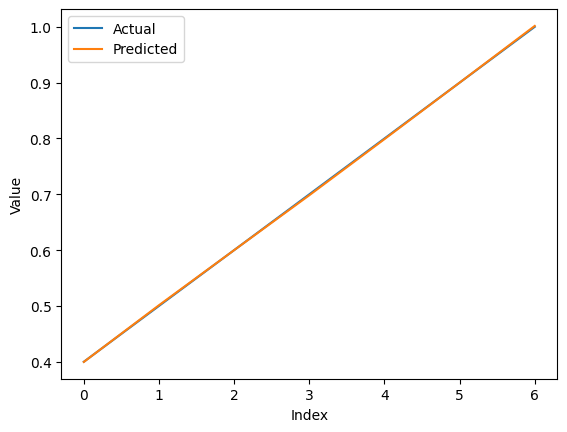

Predicted next value for [0.6, 0.7, 0.8]: 0.9000038504600525


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam

# 1. Prepare the sequence and create input-output pairs
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Function to create input-output pairs
def create_dataset(sequence, n_steps=3):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i + n_steps])
        y.append(sequence[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(sequence, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for RNN input

# 2. Build the RNN model
model = Sequential()
model.add(Input(shape=(n_steps, 1)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mse')

# 3. Train the model
history = model.fit(X, y, epochs=300, verbose=0)

# 4. Predict values using the model and plot the results
predictions = model.predict(X, verbose=0)
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# 5. Use the model to predict the next value in a new sequence
new_sequence = np.array([0.6, 0.7, 0.8]).reshape((1, n_steps, 1))
next_value = model.predict(new_sequence, verbose=0)
print(f"Predicted next value for [0.6, 0.7, 0.8]: {next_value[0][0]}")

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Sample sentences for training
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "I love machine learning and deep learning",
    "Recurrent neural networks are powerful for sequence prediction"
]

# 1. Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding

# Convert sentences to sequences of tokens
sequences = []
for sentence in sentences:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        sequence = token_list[:i+1]
        sequences.append(sequence)

# Pad sequences and split input-output pairs
max_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)  # One-hot encoding for the output

# 2. Build the RNN model
embedding_dim = 10
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed input_length
    SimpleRNN(50, activation='relu'),
    Dense(vocab_size, activation='softmax')
])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train the model
history = model.fit(X, y, epochs=300, verbose=0)

# 4. Evaluate the model’s accuracy
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 5. Use the trained model to predict the next word
def predict_next_word(model, tokenizer, text, max_length):
    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = pad_sequences([sequence], maxlen=max_length-1, padding='pre')
    predicted = np.argmax(model.predict(sequence, verbose=0), axis=-1)
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            return word
    return ""

# Predict the next word for a new sequence
new_text = "I love machine"
next_word = predict_next_word(model, tokenizer, new_text, max_length)
print(f"Predicted next word for '{new_text}': {next_word}")

Model Accuracy: 100.00%
Predicted next word for 'I love machine': learning


In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Sample reviews and labels
reviews = [
    "I loved the movie, it was fantastic!",
    "The film was terrible and boring.",
    "Amazing storyline and great acting.",
    "I did not enjoy the movie at all.",
    "It was an okay movie, not the best."
]
labels = [1, 0, 1, 0, 0]  # 1 for positive, 0 for negative

# 1. Tokenize the text reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding

# Convert reviews to sequences of integers
sequences = tokenizer.texts_to_sequences(reviews)

# 2. Pad the sequences to ensure they have the same length
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = np.array(labels)

# 3. Build the LSTM model
embedding_dim = 10
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(X, y, epochs=50, verbose=0)

# 5. Evaluate the model’s accuracy
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 6. Use the trained model to predict the sentiment of new reviews
def predict_sentiment(model, tokenizer, text, max_length):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_sequence, verbose=0)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Predict sentiment for a new review
new_review = "The plot was dull and uninteresting."
sentiment = predict_sentiment(model, tokenizer, new_review, max_length)
print(f"Predicted sentiment for '{new_review}': {sentiment}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model Accuracy: 100.00%
Predicted sentiment for 'The plot was dull and uninteresting.': Positive


In [ ]:
!pip install transformers datasets scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install fsspec==2024.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.1.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.


In [ ]:
!pip install datasets --upgrade


  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
# Import necessary libraries
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

# Step 1: Load the Dataset
dataset = load_dataset("imdb")  # IMDb is binary sentiment classification
train_dataset = dataset['train'].shuffle(seed=42).select(range(5000))  # Subset for demo purposes
test_dataset = dataset['test'].shuffle(seed=42).select(range(1000))

# Step 2: Load Pre-trained BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Step 3: Define Metrics for Evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Disable wandb logging
import os
os.environ["WANDB_DISABLED"] = "true"

# Step 4: Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Step 5: Trainer Instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Step 6: Fine-Tune the Model
trainer.train()

# Step 7: Evaluate on Test Dataset
eval_results = trainer.evaluate()

print("Evaluation Results:", eval_results)

# Step 8: Make Predictions on New Reviews
def predict_sentiment(review_text):
    # Tokenize input and move model + input tensors to the same device
    inputs = tokenizer(review_text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    # Map prediction to sentiment label
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Example
review_text = "The plot was dull and uninteresting."
print("Sentiment:", predict_sentiment(review_text))


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. U

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.373300,0.303758,0.907000,0.906155,0.892644,0.920082
2,0.249800,0.345093,0.919000,0.918264,0.904573,0.932377
3,0.134800,0.405069,0.917000,0.915907,0.905812,0.926230


Evaluation Results: {'eval_loss': 0.4050685167312622, 'eval_accuracy': 0.917, 'eval_f1': 0.9159067882472138, 'eval_precision': 0.905811623246493, 'eval_recall': 0.9262295081967213, 'eval_runtime': 27.8904, 'eval_samples_per_second': 35.855, 'eval_steps_per_second': 4.482, 'epoch': 3.0}
Sentiment: Negative


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-8 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 3.87M/3.87M [00:00<00:00, 71.1MB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


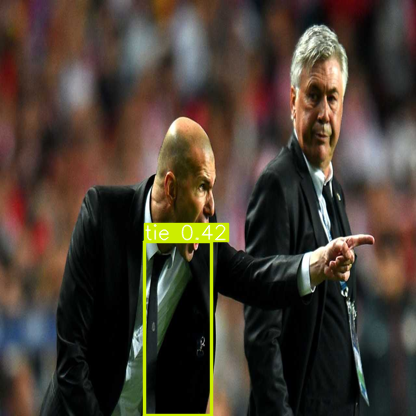

Saved 1 image to runs/detect/exp


In [6]:
import torch
from PIL import Image
import requests  # Import the requests library
import matplotlib.pyplot as plt

# Load YOLOv5 nano model for lighter memory usage
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')

# Download a sample image
sample_image_url = 'https://ultralytics.com/images/zidane.jpg'
sample_image = Image.open(requests.get(sample_image_url, stream=True).raw)

# Optionally resize to reduce memory usage
sample_image = sample_image.resize((416, 416))

# Run inference with torch.no_grad() to save memory
with torch.no_grad():
    results = model(sample_image)

# Display results
results.show()    # This shows the image with bounding boxes and labels in Colab

# Save results (optional)
results.save()    # Saves to the default directory under YOLOv5's folder structure

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.9MB/s]


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Epoch [1/50], Step [200/938], D Loss: 0.1518, G Loss: 3.4584
Epoch [1/50], Step [400/938], D Loss: 1.3196, G Loss: 2.9031
Epoch [1/50], Step [600/938], D Loss: 0.8065, G Loss: 6.1423
Epoch [1/50], Step [800/938], D Loss: 1.4723, G Loss: 0.6681
Epoch [2/50], Step [200/938], D Loss: 1.0843, G Loss: 1.6816
Epoch [2/50], Step [400/938], D Loss: 2.2244, G Loss: 1.9659
Epoch [2/50], Step [600/938], D Loss: 1.2312, G Loss: 0.9582
Epoch [2/50], Step [800/938], D Loss: 0.1278, G Loss: 3.7067
Epoch [3/50], Step [200/938], D Loss: 0.1301, G Loss: 7.5624
Epoch [3/50], Step [400/938], D Loss: 0.1997, G Loss: 2.3226
Epoch [3/50], Step [600/938], D Loss: 1.2925, G Loss: 2.9162
Epoch [3/50], Step [800/938], D Loss: 0.1442, G Loss: 2.8845
Epoch [4/50], Step [200/938], D Loss: 0.2305, G Loss: 2.8876
Epoch [4/50], Step [400/938], D Loss: 0.0543, G Loss: 4.3467
Epoch [4/50], Step [600/938], D Loss: 1.4921, G Loss: 4.7795
Ep

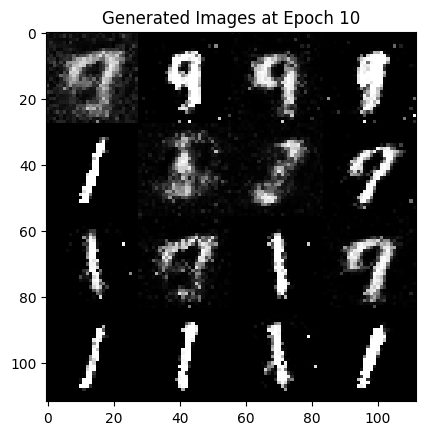

Epoch [11/50], Step [200/938], D Loss: 0.5308, G Loss: 2.8174
Epoch [11/50], Step [400/938], D Loss: 0.6537, G Loss: 2.1326
Epoch [11/50], Step [600/938], D Loss: 0.5214, G Loss: 2.3747
Epoch [11/50], Step [800/938], D Loss: 0.2896, G Loss: 3.1527
Epoch [12/50], Step [200/938], D Loss: 0.7177, G Loss: 1.9345
Epoch [12/50], Step [400/938], D Loss: 0.4071, G Loss: 2.1368
Epoch [12/50], Step [600/938], D Loss: 1.0502, G Loss: 1.5238
Epoch [12/50], Step [800/938], D Loss: 0.4865, G Loss: 2.7017
Epoch [13/50], Step [200/938], D Loss: 0.8740, G Loss: 1.5023
Epoch [13/50], Step [400/938], D Loss: 0.4059, G Loss: 2.4034
Epoch [13/50], Step [600/938], D Loss: 0.3809, G Loss: 2.0929
Epoch [13/50], Step [800/938], D Loss: 0.5048, G Loss: 2.4360
Epoch [14/50], Step [200/938], D Loss: 0.6002, G Loss: 2.2198
Epoch [14/50], Step [400/938], D Loss: 0.7547, G Loss: 1.4371
Epoch [14/50], Step [600/938], D Loss: 0.8605, G Loss: 1.9819
Epoch [14/50], Step [800/938], D Loss: 0.6710, G Loss: 1.9395
Epoch [1

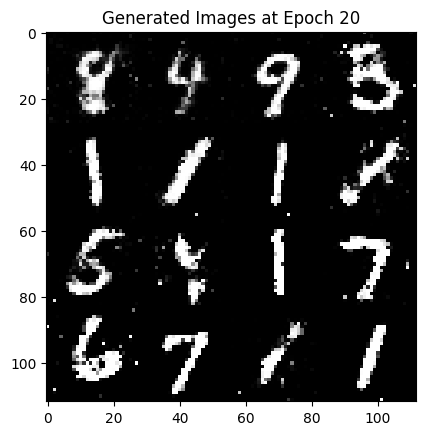

Epoch [21/50], Step [200/938], D Loss: 0.9413, G Loss: 1.2995
Epoch [21/50], Step [400/938], D Loss: 0.5462, G Loss: 1.7332
Epoch [21/50], Step [600/938], D Loss: 1.0787, G Loss: 1.2689
Epoch [21/50], Step [800/938], D Loss: 0.5584, G Loss: 1.8475
Epoch [22/50], Step [200/938], D Loss: 0.8949, G Loss: 1.4356
Epoch [22/50], Step [400/938], D Loss: 0.9300, G Loss: 1.3073
Epoch [22/50], Step [600/938], D Loss: 0.7241, G Loss: 1.8093
Epoch [22/50], Step [800/938], D Loss: 0.7193, G Loss: 1.5644
Epoch [23/50], Step [200/938], D Loss: 1.1517, G Loss: 1.3514
Epoch [23/50], Step [400/938], D Loss: 0.7079, G Loss: 1.3980
Epoch [23/50], Step [600/938], D Loss: 0.5857, G Loss: 1.6623
Epoch [23/50], Step [800/938], D Loss: 1.1105, G Loss: 1.3974
Epoch [24/50], Step [200/938], D Loss: 1.0034, G Loss: 1.5142
Epoch [24/50], Step [400/938], D Loss: 0.9823, G Loss: 1.4411
Epoch [24/50], Step [600/938], D Loss: 0.8531, G Loss: 1.3413
Epoch [24/50], Step [800/938], D Loss: 1.0721, G Loss: 1.7564
Epoch [2

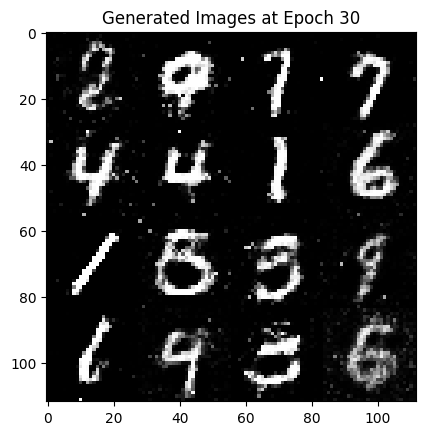

Epoch [31/50], Step [200/938], D Loss: 0.9464, G Loss: 1.4878
Epoch [31/50], Step [400/938], D Loss: 0.9719, G Loss: 1.5101
Epoch [31/50], Step [600/938], D Loss: 1.1297, G Loss: 1.4403
Epoch [31/50], Step [800/938], D Loss: 0.9643, G Loss: 1.8663
Epoch [32/50], Step [200/938], D Loss: 1.0064, G Loss: 1.8006
Epoch [32/50], Step [400/938], D Loss: 1.2655, G Loss: 1.2097
Epoch [32/50], Step [600/938], D Loss: 1.3323, G Loss: 1.1334
Epoch [32/50], Step [800/938], D Loss: 1.3797, G Loss: 1.0941
Epoch [33/50], Step [200/938], D Loss: 1.0146, G Loss: 1.3526
Epoch [33/50], Step [400/938], D Loss: 0.9230, G Loss: 1.3760
Epoch [33/50], Step [600/938], D Loss: 1.0172, G Loss: 1.3311
Epoch [33/50], Step [800/938], D Loss: 1.0566, G Loss: 0.9952
Epoch [34/50], Step [200/938], D Loss: 1.2532, G Loss: 1.0929
Epoch [34/50], Step [400/938], D Loss: 1.0270, G Loss: 1.1635
Epoch [34/50], Step [600/938], D Loss: 1.1786, G Loss: 1.0760
Epoch [34/50], Step [800/938], D Loss: 1.0889, G Loss: 1.0762
Epoch [3

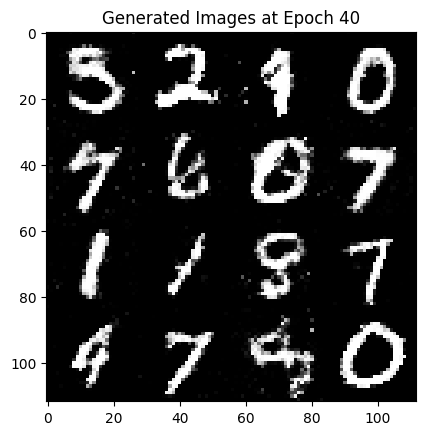

Epoch [41/50], Step [200/938], D Loss: 1.1023, G Loss: 1.3197
Epoch [41/50], Step [400/938], D Loss: 0.9282, G Loss: 1.1079
Epoch [41/50], Step [600/938], D Loss: 1.1843, G Loss: 1.4223
Epoch [41/50], Step [800/938], D Loss: 1.2499, G Loss: 1.3380
Epoch [42/50], Step [200/938], D Loss: 1.4361, G Loss: 1.0339
Epoch [42/50], Step [400/938], D Loss: 1.3308, G Loss: 0.9882
Epoch [42/50], Step [600/938], D Loss: 1.1090, G Loss: 1.1747
Epoch [42/50], Step [800/938], D Loss: 1.2715, G Loss: 1.1579
Epoch [43/50], Step [200/938], D Loss: 1.1340, G Loss: 1.0991
Epoch [43/50], Step [400/938], D Loss: 1.0340, G Loss: 1.0301
Epoch [43/50], Step [600/938], D Loss: 1.0925, G Loss: 1.2858
Epoch [43/50], Step [800/938], D Loss: 1.2413, G Loss: 0.9114
Epoch [44/50], Step [200/938], D Loss: 1.1426, G Loss: 1.1702
Epoch [44/50], Step [400/938], D Loss: 1.1455, G Loss: 0.9836
Epoch [44/50], Step [600/938], D Loss: 1.3053, G Loss: 0.8910
Epoch [44/50], Step [800/938], D Loss: 1.3908, G Loss: 1.0939
Epoch [4

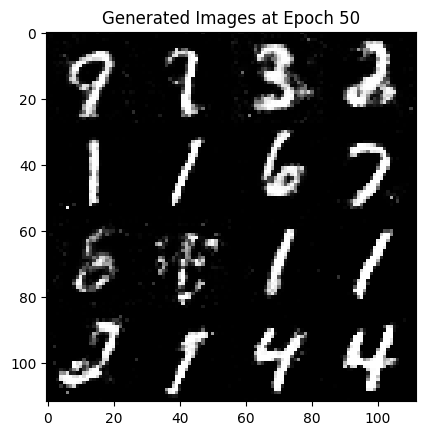

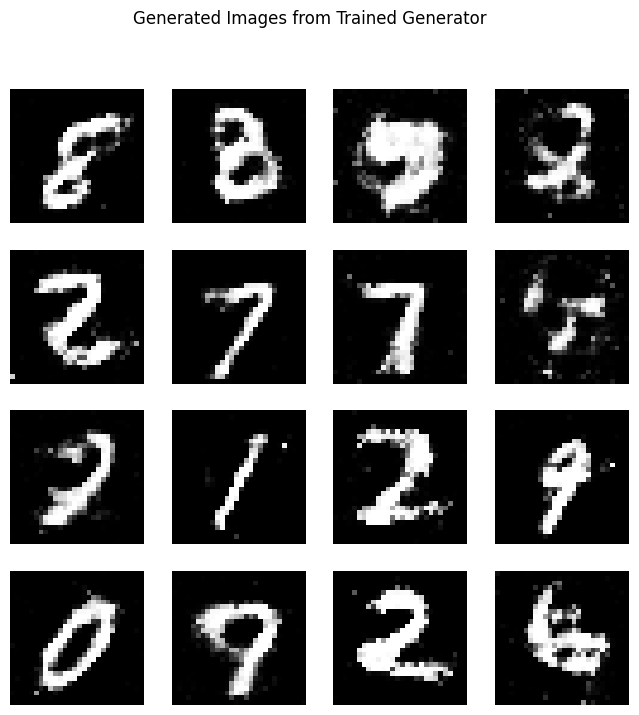

In [5]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_data = datasets.MNIST(root='mnist_data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define Generator
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=784):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()  # Output is normalized to [-1, 1]
        )

    def forward(self, x):
        return self.model(x)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=784):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability for real/fake
        )

    def forward(self, x):
        return self.model(x)

# Initialize generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
lr = 0.0002
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Function to generate random noise
def generate_noise(batch_size, input_dim=100):
    return torch.randn(batch_size, input_dim, device=device)

# Training the GAN
epochs = 50
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1).to(device)

        # Labels for real and fake images
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        optimizer_D.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        noise = generate_noise(batch_size)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)  # Try to "fool" the discriminator
        g_loss.backward()
        optimizer_G.step()

        if (i+1) % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Generate and visualize images at the end of each epoch
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            test_noise = generate_noise(16)
            generated_images = generator(test_noise).view(-1, 1, 28, 28).cpu()
            grid = torch.cat([torch.cat([generated_images[i] for i in range(4 * j, 4 * (j + 1))], dim=2) for j in range(4)], dim=1)
            plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
            plt.title(f"Generated Images at Epoch {epoch + 1}")
            plt.show()

# Use the trained generator to generate new images
with torch.no_grad():
    noise = generate_noise(16)
    new_images = generator(noise).view(-1, 1, 28, 28).cpu()

    # Visualize generated images
    plt.figure(figsize=(8, 8))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(new_images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Images from Trained Generator")
    plt.show()


In [2]:
!pip install datasets --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
